## Tractography Reeb Graph Construction

This notebook demonstrates the construction and visualization of Reeb graphs for tractography data. The workflow involves:

- Importing necessary packages for data handling, graph construction, and visualization.
- Setting Reeb graph parameters:  
    - **epsilon (ε):** Distance threshold for streamline sparsity  
    - **alpha (α):** Spatial length for persistence  
    - **delta (δ):** Bundle thickness
- Loading streamlines from `.trk` files located in the `data` directory.
- Constructing and visualizing the Reeb graph for the tract file.

### Reeb Graph Components

- **Nodes:**  
    Represent spatial locations where bundles of streamlines merge, split, or terminate. Each node corresponds to a significant topological event in the tractography data.

- **Edges:**  
    Connect pairs of nodes and represent continuous bundles of streamlines between these events. An edge traces the path of streamlines as they travel between two nodes.

- **Edge Weight (Count of Streamlines):**  
    The weight of an edge is defined as the number of streamlines that pass through the corresponding bundle. This count provides a quantitative measure of the bundle's prominence within the tractography dataset.

In [1]:
#Import all the necessary package.
import numpy as np
import nibabel as nib
import networkx as nx
import matplotlib.pyplot as plt
import reebundle.construct as rc
import os
import pickle
from mpl_toolkits.mplot3d import Axes3D
import warnings
import reebundle.visualization as vis
import reebundle.distance as sn

warnings.filterwarnings('ignore')

### Example 1: Anterior Commissure (CA)

Constructing Reeb Graph for CP.trk


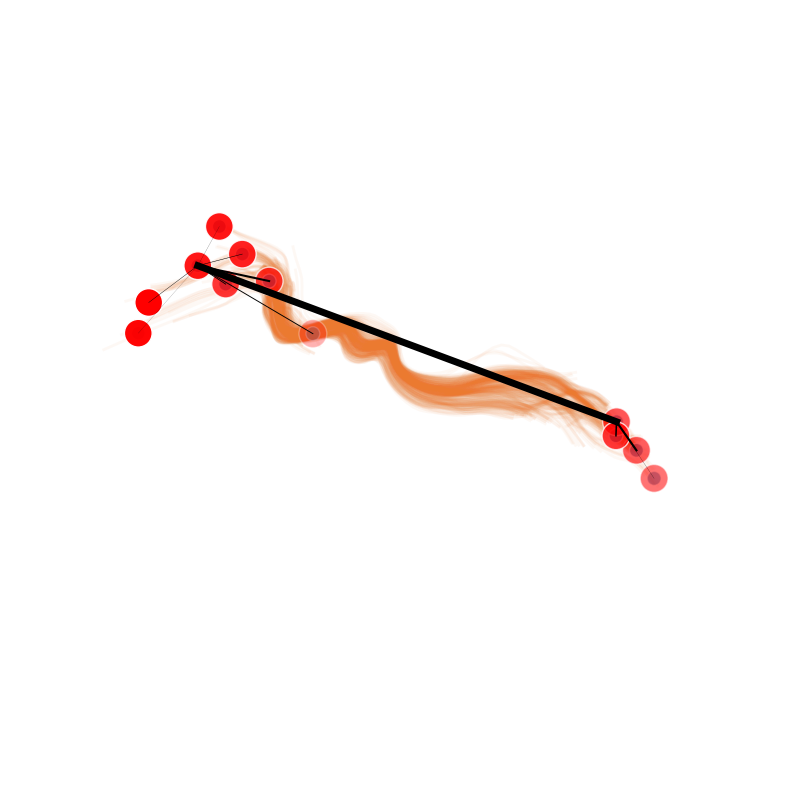

In [2]:
eps = 2.5
alpha = 3
delta = 5
trkpathI = "data/ISMRM/"
file = "CP.trk"
print("Constructing Reeb Graph for", file)
streamlines = nib.streamlines.load(trkpathI+file).streamlines
h, node_loc = rc.constructRobustReeb(streamlines, eps, alpha, delta)
vis.graph_vis(h,node_loc,streamlines)

## Interactive Visualization of the Reeb Graph

For detailed examination of the Reeb graph structure and its correspondence to the original streamlines, we provide an interactive 3D visualization of the Reeb graph:

- **Navigation:**  
    - Rotate, zoom, and pan to inspect the spatial relationships between nodes and edges.
- **Features:**  
    - Nodes represent topological events (merges, splits, terminations).
    - Edges correspond to bundles of streamlines.


### Example 2: Posterior Commissure (CP)

Constructing Reeb Graph for CA.trk


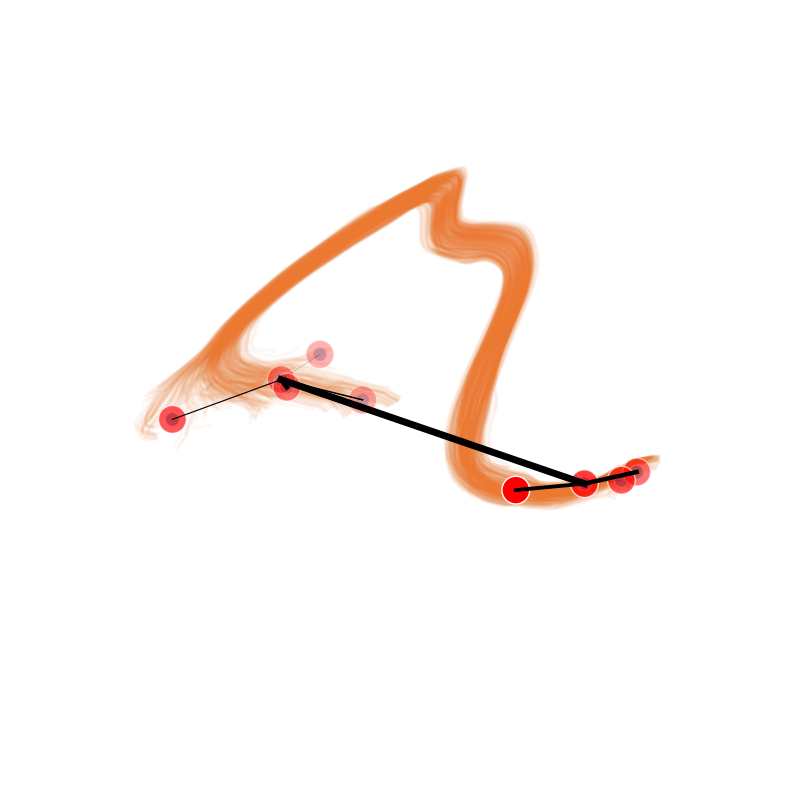

In [3]:
eps = 2.5
alpha = 3
delta = 5

trkpathI = "data/ISMRM/"
file = "CA.trk"
print("Constructing Reeb Graph for", file)
streamlines = nib.streamlines.load(trkpathI+file).streamlines
h, node_loc = rc.constructRobustReeb(streamlines, eps, alpha, delta)
vis.graph_vis(h,node_loc,streamlines)
vis.plot_reeb_graph_3d(h,node_loc,streamlines)


### Computing the Distance Between Reeb Graphs for Corpus Callosum (CC) Tracts

To quantitatively compare the topological similarity between two corpus callosum (CC) tracts, we compute the distance between their corresponding Reeb graphs, \( H1 \) and \( H2 \). This distance metric captures differences in the structure and spatial organization of the tract bundles.

- **Inputs:**  
    - \( H1 \), \( H2 \): Reeb graphs constructed from two CC tract files.
    - `node_loc_all1`, `node_loc_all2`: Spatial locations of nodes in each graph.
    - `eps`, `alpha`, `delta`: Parameters controlling graph construction and distance sensitivity.

- **Computation:**  
    The function `sn.compute_graph_distance` calculates the distance between the two graphs, providing a quantitative measure of their similarity.

- **Interpretation:**  
    - A smaller distance indicates higher similarity between the two CC tracts.
    - A larger distance suggests greater topological or spatial differences.

This approach enables objective comparison of white matter structures across subjects or conditions.

### Example 3: Computing Distance Between Two Corpus Callosum (CC) Tracts

In [4]:
eps =2.5
alpha = 3
delta = 2   
trkpathI = "data/CRASH/sub-4961a_ses-4_DSI_mc.src.gz.odf8.f5rec.gqi.1.25.ref.cc.trk.gz"    
streamlines = nib.streamlines.load(trkpathI).streamlines               
H1, node_loc_all1 = rc.constructRobustReeb(streamlines, eps, alpha, delta)

trkpathI = "data/CRASH/sub-4961a_ses-1_DSI_mc.src.gz.odf8.f5rec.gqi.1.25.ref.cc.trk.gz"    
streamlines = nib.streamlines.load(trkpathI).streamlines  
H2, node_loc_all2 = rc.constructRobustReeb(streamlines, eps, alpha, delta)

dist = sn.compute_graph_distance(H1, H2, node_loc_all1, node_loc_all2, eps, alpha, delta)
print("Distance between H1 and H2: ", dist)

Distance between H1 and H2:  6.800847
